In [265]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_moons
X, y_ = make_moons(1000, noise=.2)
y = y_[:, np.newaxis]           # Make it a one-column matrix

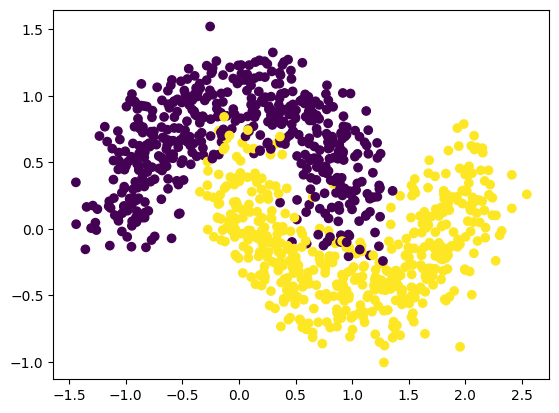

In [266]:
plt.scatter(X[:,0], X[:,1], c=y)

In [267]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dsigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

def loss(y, ypr):
    return (ypr - y)**2

def dloss(y, ypr):
    return ypr - y

In [268]:
n0 = 2 # 输入层神经元数
n1 = 50 # 隐藏层
n2 = 1 # 输出层

In [276]:
# Weights
W1 = np.random.randn(n0, n1)
W2 = np.random.randn(n1, n2)

# Biases
b1 = np.random.randn(n1)
b2 = np.random.randn(n2)

In [270]:
# 向量化版本实现
nepochs = 10000
alpha = 0.001

for epoch in range(nepochs):
    z1 = X @ W1 + b1  # 1000x50
    x1 = relu(z1)     # 1000x50
    z2 = x1 @ W2 + b2 # 1000x1
    ypr = sigmoid(z2) # 1000x1
    
    d2 = dloss(y,ypr) * dsigmoid(z2)
    W2 -= alpha * x1.T @ d2 
    b2 -= alpha * np.sum(d2)
    
    d1 = d2 @ W2.T * drelu(z1)
    W1 -= alpha * X.T @ d1 
    b1 -= alpha * np.sum(d1)
    if epoch % 1000 == 0:
        print("loss:", np.sum(loss(y, ypr)))

loss: 221.98736050072864
loss: 29.51355738164134
loss: 26.747983220418774
loss: 25.615382948738695
loss: 25.08194552284032
loss: 24.768194583706602
loss: 24.54107446046755
loss: 24.37203560036636
loss: 24.24511571944595
loss: 24.101882632413105


In [277]:
nepochs = 1000
alpha = 0.001

# 假设 X 和 y 已经定义好，并且 X 的每一行是一个样本
for epoch in range(nepochs):
    # 对于每个样本进行迭代
    for i in range(X.shape[0]):
        # 取第 i 个样本
        x0 = X[i, :].reshape(1, -1)  # 确保 x0 是一个行向量
        y0 = y[i, :].reshape(1, -1)  # 确保 y0 也是一个行向量

        # 前向传播
        z1 = x0 @ W1 + b1
        x1 = relu(z1)
        z2 = x1 @ W2 + b2
        ypr = sigmoid(z2)

        # 计算梯度
        d2 = dloss(y0, ypr) * dsigmoid(z2)
        W2 -= alpha * x1.T @ d2 
        b2 -= alpha * np.sum(d2)

        d1 = d2 @ W2.T * drelu(z1)
        W1 -= alpha * x0.T @ d1 
        b1 -= alpha * np.sum(d1)

    # 每隔1000次迭代打印一次损失
    if epoch % 100 == 0:
        # 重新计算整个数据集的损失，用于监控
        z1 = X @ W1 + b1
        x1 = relu(z1)
        z2 = x1 @ W2 + b2
        ypr = sigmoid(z2)
        print("loss:", np.sum(loss(y, ypr)))

loss: 246.96453540833872
loss: 80.48865382387989
loss: 54.86396319736285
loss: 45.37522782671019
loss: 40.38568063126755
loss: 37.352937802186034
loss: 35.28836885851247
loss: 33.798163667095196
loss: 32.67305968166777
loss: 31.775791392734707


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 1000.

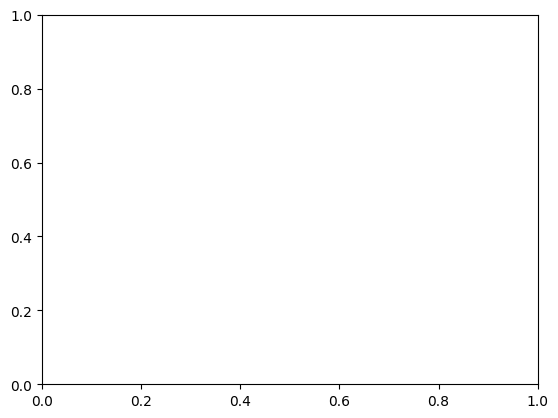

In [275]:
ypr = (ypr > 0.5)
plt.scatter(X[:,0], X[:,1], c=ypr)

In [271]:
# 使用for循环对每个样本进行计算
